# Plan

- 'maximum_speed_limit' 이 랜덤포레스트에서 높은 중요도를 가짐 : 주형 EDA
- test 에 속도 40 제한 구역이 없다.
- 제한속도별로 랜덤포레스트를 돌린후 다시합치는 계획

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
train = pd.read_parquet('./train.parquet')
test = pd.read_parquet('./test.parquet')
train = train.drop(['road_in_use','vehicle_restricted','height_restricted'],axis=1)
test = test.drop(['road_in_use','vehicle_restricted','height_restricted'],axis=1)

<AxesSubplot:>

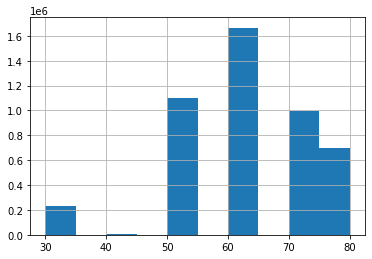

In [11]:
train['maximum_speed_limit'].hist()

In [12]:
train["maximum_speed_limit"].value_counts()

60.0    1665573
50.0    1103682
70.0     995077
80.0     700334
30.0     229761
40.0       6790
Name: maximum_speed_limit, dtype: int64

<AxesSubplot:>

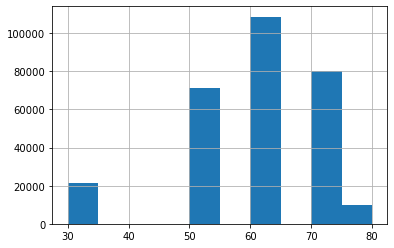

In [13]:
test['maximum_speed_limit'].hist()

In [14]:
test["maximum_speed_limit"].value_counts()

60.0    108606
70.0     80356
50.0     71315
30.0     21350
80.0      9614
Name: maximum_speed_limit, dtype: int64

- 제한속도별로 랜덤포레스트를 돌린후 다시합치는 계획 : 예시로 속도 80제한 데이터만 추출하여 랜덤포레스트 돌려본다.
- "maximum_speed_limit" 분리되면 사용되지 않으므로 레이블인코딩 제외

In [4]:
from sklearn.preprocessing import LabelEncoder
str_col = ["base_date","base_hour","day_of_week","lane_count","road_rating","multi_linked","connect_code"
           ,"weight_restricted","road_type","start_latitude","start_longitude","start_turn_restricted",
          "end_turn_restricted","road_name","start_node_name","end_node_name",'end_latitude','end_longitude'] # "maximum_speed_limit"
for i in str_col:
    le = LabelEncoder()
    le=le.fit(train[i])
    train[i]=le.transform(train[i])
    
    for label in np.unique(test[i]):
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test[i]=le.transform(test[i])

In [42]:
train = train[train["maximum_speed_limit"]==80]
y_train = train['target'] 
X_train = train.drop(['id', 'target'], axis=1)

test = test[test["maximum_speed_limit"]==80]
test_id = test['id']
test = test.drop(['id'], axis=1)

print(X_train.shape)
print(y_train.shape)
print(test.shape)

(700334, 19)
(700334,)
(9614, 19)


In [43]:
prediction_table = pd.DataFrame(test_id)

In [44]:
X_train,X_test,y_train,y_test = train_test_split(
    X_train,y_train,test_size=0.1,random_state=10
)

In [45]:
from sklearn.ensemble import RandomForestRegressor
tp = RandomForestRegressor(random_state=56)
tp.fit(X_train,y_train)
pred = tp.predict(X_test)
mae = mean_absolute_error(pred,y_test)
print(mae)

2.458636233829283


In [46]:
prediction_table['target'] = tp.predict(test)

In [47]:
prediction_table.to_csv('./target80.csv')

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor


r1 = RandomForestRegressor(random_state=10,criterion='absolute_error')
r2 = CatBoostRegressor(random_state=10)
r3 = ExtraTreesRegressor(random_state=10,criterion='absolute_error')
vote = VotingRegressor([('r1', r1), ('r2', r2), ('r3', r3)])
vote.fit(X_train,y_train)

In [1]:
train = train.drop(['road_in_use','vehicle_restricted','height_restricted'],axis=1)


NameError: name 'train' is not defined

In [9]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

def rf_speed(speed):
    train = pd.read_parquet('./train.parquet')
    test = pd.read_parquet('./test.parquet')
    train = train.drop(['road_in_use','vehicle_restricted','height_restricted'],axis=1)
    test = test.drop(['road_in_use','vehicle_restricted','height_restricted'],axis=1)
    
    if speed == 70:
        
        for i in train[]
        
        str_col = ["base_date","base_hour","day_of_week","lane_count","multi_linked","connect_code"
        ,"weight_restricted","road_type","start_latitude","start_longitude","start_turn_restricted",
        "end_turn_restricted","road_name","start_node_name","end_node_name",'end_latitude','end_longitude'] # "maximum_speed_limit"
        for i in str_col:
            le = LabelEncoder()
            le=le.fit(train[i])
            train[i]=le.transform(train[i])

            for label in np.unique(test[i]):
                if label not in le.classes_: 
                    le.classes_ = np.append(le.classes_, label)
            test[i]=le.transform(test[i])

        train = train[train["maximum_speed_limit"]==speed]
        y_train = train['target'] 
        X_train = train.drop(['id', 'target'], axis=1)

        test = test[test["maximum_speed_limit"]==speed]
        test_id = test['id']
        test = test.drop(['id'], axis=1)

        prediction_table = pd.DataFrame(test_id)
        
        X_train,X_test,y_train,y_test = train_test_split(
            X_train,y_train,test_size=0.2,random_state=10
        )

        r1 = RandomForestRegressor(random_state=10)
        r2 = CatBoostRegressor(random_state=10)
        r3 = ExtraTreesRegressor(random_state=10)
        vote = VotingRegressor([('r1', r1), ('r2', r2), ('r3', r3)])

        parms = {'verbose':[True]}
        grid_cv = GridSearchCV(vote,param_grid=parms,cv=5,n_jobs=-1,scoring='neg_mean_absolute_error')# ,param_grid=parms
        grid_cv.fit(X_train,y_train)

        pred = grid_cv.predict(X_test)
        mae = mean_absolute_error(pred,y_test)
        print(mae)

        prediction_table['target'] = grid_cv.predict(test)
        prediction_table.to_csv(f'./target{speed}.csv')
        print(f'save {speed}')
    
    else:
        str_col = ["base_date","base_hour","day_of_week","lane_count","road_rating","multi_linked","connect_code"
               ,"weight_restricted","road_type","start_latitude","start_longitude","start_turn_restricted",
              "end_turn_restricted","road_name","start_node_name","end_node_name",'end_latitude','end_longitude'] # "maximum_speed_limit"
        for i in str_col:
            le = LabelEncoder()
            le=le.fit(train[i])
            train[i]=le.transform(train[i])

            for label in np.unique(test[i]):
                if label not in le.classes_: 
                    le.classes_ = np.append(le.classes_, label)
            test[i]=le.transform(test[i])

        train = train[train["maximum_speed_limit"]==speed]
        y_train = train['target'] 
        X_train = train.drop(['id', 'target'], axis=1)

        test = test[test["maximum_speed_limit"]==speed]
        test_id = test['id']
        test = test.drop(['id'], axis=1)

        prediction_table = pd.DataFrame(test_id)
    
        X_train,X_test,y_train,y_test = train_test_split(
            X_train,y_train,test_size=0.2,random_state=10
        )

        r1 = RandomForestRegressor(random_state=10)
        r2 = CatBoostRegressor(random_state=10)
        r3 = ExtraTreesRegressor(random_state=10)
        vote = VotingRegressor([('r1', r1), ('r2', r2), ('r3', r3)])

        parms = {'verbose':[True]}
        grid_cv = GridSearchCV(vote,param_grid=parms,cv=5,n_jobs=-1,scoring='neg_mean_absolute_error')# ,param_grid=parms
        grid_cv.fit(X_train,y_train)

        pred = grid_cv.predict(X_test)
        mae = mean_absolute_error(pred,y_test)
        print(mae)

        prediction_table['target'] = grid_cv.predict(test)
        prediction_table.to_csv(f'./target{speed}.csv')
        print(f'save {speed}')

In [10]:
rf_speed(80)
rf_speed(70)
rf_speed(60)
rf_speed(50)
rf_speed(30) # voting 

[Voting] ....................... (1 of 3) Processing r1, total= 2.8min
Learning rate set to 0.111282
0:	learn: 12.6080286	total: 62ms	remaining: 1m 1s
1:	learn: 11.8449001	total: 92.7ms	remaining: 46.3s
2:	learn: 11.1785933	total: 124ms	remaining: 41.4s
3:	learn: 10.6207203	total: 164ms	remaining: 40.8s
4:	learn: 10.1372367	total: 193ms	remaining: 38.4s
5:	learn: 9.7169159	total: 224ms	remaining: 37.1s
6:	learn: 9.3653620	total: 254ms	remaining: 36.1s
7:	learn: 9.0694441	total: 285ms	remaining: 35.3s
8:	learn: 8.8253404	total: 314ms	remaining: 34.5s
9:	learn: 8.6178602	total: 343ms	remaining: 34s
10:	learn: 8.4158587	total: 376ms	remaining: 33.8s
11:	learn: 8.2388586	total: 406ms	remaining: 33.4s
12:	learn: 8.0899978	total: 435ms	remaining: 33s
13:	learn: 7.9641566	total: 466ms	remaining: 32.8s
14:	learn: 7.8437899	total: 497ms	remaining: 32.6s
15:	learn: 7.7316573	total: 533ms	remaining: 32.8s
16:	learn: 7.6245586	total: 564ms	remaining: 32.6s
17:	learn: 7.5317311	total: 594ms	remaini

162:	learn: 5.0742207	total: 4.55s	remaining: 23.3s
163:	learn: 5.0704441	total: 4.57s	remaining: 23.3s
164:	learn: 5.0663649	total: 4.6s	remaining: 23.3s
165:	learn: 5.0635651	total: 4.63s	remaining: 23.2s
166:	learn: 5.0600209	total: 4.65s	remaining: 23.2s
167:	learn: 5.0534241	total: 4.68s	remaining: 23.2s
168:	learn: 5.0506757	total: 4.71s	remaining: 23.2s
169:	learn: 5.0454697	total: 4.74s	remaining: 23.1s
170:	learn: 5.0396324	total: 4.76s	remaining: 23.1s
171:	learn: 5.0346265	total: 4.79s	remaining: 23.1s
172:	learn: 5.0322880	total: 4.82s	remaining: 23s
173:	learn: 5.0279656	total: 4.84s	remaining: 23s
174:	learn: 5.0235295	total: 4.87s	remaining: 23s
175:	learn: 5.0192197	total: 4.9s	remaining: 23s
176:	learn: 5.0166278	total: 4.93s	remaining: 22.9s
177:	learn: 5.0152034	total: 4.96s	remaining: 22.9s
178:	learn: 5.0080211	total: 4.99s	remaining: 22.9s
179:	learn: 5.0032076	total: 5.02s	remaining: 22.9s
180:	learn: 4.9979124	total: 5.05s	remaining: 22.8s
181:	learn: 4.9922433	

327:	learn: 4.6597933	total: 9.14s	remaining: 18.7s
328:	learn: 4.6586904	total: 9.17s	remaining: 18.7s
329:	learn: 4.6568755	total: 9.2s	remaining: 18.7s
330:	learn: 4.6560548	total: 9.22s	remaining: 18.6s
331:	learn: 4.6530777	total: 9.25s	remaining: 18.6s
332:	learn: 4.6517112	total: 9.28s	remaining: 18.6s
333:	learn: 4.6494504	total: 9.31s	remaining: 18.6s
334:	learn: 4.6486165	total: 9.33s	remaining: 18.5s
335:	learn: 4.6474969	total: 9.36s	remaining: 18.5s
336:	learn: 4.6455085	total: 9.39s	remaining: 18.5s
337:	learn: 4.6444142	total: 9.41s	remaining: 18.4s
338:	learn: 4.6434768	total: 9.44s	remaining: 18.4s
339:	learn: 4.6421304	total: 9.47s	remaining: 18.4s
340:	learn: 4.6411270	total: 9.5s	remaining: 18.4s
341:	learn: 4.6395855	total: 9.52s	remaining: 18.3s
342:	learn: 4.6381815	total: 9.55s	remaining: 18.3s
343:	learn: 4.6376599	total: 9.57s	remaining: 18.3s
344:	learn: 4.6362072	total: 9.6s	remaining: 18.2s
345:	learn: 4.6355262	total: 9.62s	remaining: 18.2s
346:	learn: 4.6

494:	learn: 4.4803326	total: 13.8s	remaining: 14.1s
495:	learn: 4.4800453	total: 13.8s	remaining: 14s
496:	learn: 4.4783185	total: 13.9s	remaining: 14s
497:	learn: 4.4777781	total: 13.9s	remaining: 14s
498:	learn: 4.4772817	total: 13.9s	remaining: 14s
499:	learn: 4.4766106	total: 13.9s	remaining: 13.9s
500:	learn: 4.4760366	total: 14s	remaining: 13.9s
501:	learn: 4.4747613	total: 14s	remaining: 13.9s
502:	learn: 4.4741200	total: 14s	remaining: 13.8s
503:	learn: 4.4734462	total: 14s	remaining: 13.8s
504:	learn: 4.4730610	total: 14.1s	remaining: 13.8s
505:	learn: 4.4722616	total: 14.1s	remaining: 13.8s
506:	learn: 4.4715567	total: 14.1s	remaining: 13.7s
507:	learn: 4.4711677	total: 14.1s	remaining: 13.7s
508:	learn: 4.4707232	total: 14.2s	remaining: 13.7s
509:	learn: 4.4700600	total: 14.2s	remaining: 13.6s
510:	learn: 4.4693575	total: 14.2s	remaining: 13.6s
511:	learn: 4.4687242	total: 14.2s	remaining: 13.6s
512:	learn: 4.4672851	total: 14.3s	remaining: 13.5s
513:	learn: 4.4665208	total:

659:	learn: 4.3817542	total: 18.4s	remaining: 9.49s
660:	learn: 4.3812733	total: 18.5s	remaining: 9.46s
661:	learn: 4.3809656	total: 18.5s	remaining: 9.44s
662:	learn: 4.3804924	total: 18.5s	remaining: 9.41s
663:	learn: 4.3801440	total: 18.5s	remaining: 9.38s
664:	learn: 4.3798693	total: 18.6s	remaining: 9.35s
665:	learn: 4.3795707	total: 18.6s	remaining: 9.33s
666:	learn: 4.3784318	total: 18.6s	remaining: 9.3s
667:	learn: 4.3780847	total: 18.7s	remaining: 9.27s
668:	learn: 4.3777978	total: 18.7s	remaining: 9.25s
669:	learn: 4.3774602	total: 18.7s	remaining: 9.22s
670:	learn: 4.3769229	total: 18.7s	remaining: 9.19s
671:	learn: 4.3766204	total: 18.8s	remaining: 9.16s
672:	learn: 4.3760294	total: 18.8s	remaining: 9.13s
673:	learn: 4.3756847	total: 18.8s	remaining: 9.11s
674:	learn: 4.3753237	total: 18.9s	remaining: 9.08s
675:	learn: 4.3749225	total: 18.9s	remaining: 9.05s
676:	learn: 4.3744701	total: 18.9s	remaining: 9.02s
677:	learn: 4.3741185	total: 18.9s	remaining: 8.99s
678:	learn: 4

821:	learn: 4.3153094	total: 23s	remaining: 4.98s
822:	learn: 4.3150937	total: 23s	remaining: 4.96s
823:	learn: 4.3146862	total: 23.1s	remaining: 4.93s
824:	learn: 4.3144296	total: 23.1s	remaining: 4.9s
825:	learn: 4.3141472	total: 23.1s	remaining: 4.87s
826:	learn: 4.3139386	total: 23.1s	remaining: 4.84s
827:	learn: 4.3136485	total: 23.2s	remaining: 4.81s
828:	learn: 4.3135451	total: 23.2s	remaining: 4.79s
829:	learn: 4.3131885	total: 23.2s	remaining: 4.76s
830:	learn: 4.3128865	total: 23.3s	remaining: 4.73s
831:	learn: 4.3125784	total: 23.3s	remaining: 4.7s
832:	learn: 4.3123922	total: 23.3s	remaining: 4.67s
833:	learn: 4.3116074	total: 23.3s	remaining: 4.64s
834:	learn: 4.3112843	total: 23.4s	remaining: 4.62s
835:	learn: 4.3110657	total: 23.4s	remaining: 4.59s
836:	learn: 4.3108341	total: 23.4s	remaining: 4.56s
837:	learn: 4.3106172	total: 23.4s	remaining: 4.53s
838:	learn: 4.3104527	total: 23.5s	remaining: 4.5s
839:	learn: 4.3100200	total: 23.5s	remaining: 4.47s
840:	learn: 4.30970

980:	learn: 4.2676824	total: 27.4s	remaining: 531ms
981:	learn: 4.2674137	total: 27.5s	remaining: 503ms
982:	learn: 4.2671711	total: 27.5s	remaining: 475ms
983:	learn: 4.2667175	total: 27.5s	remaining: 447ms
984:	learn: 4.2664254	total: 27.5s	remaining: 419ms
985:	learn: 4.2661619	total: 27.6s	remaining: 391ms
986:	learn: 4.2659480	total: 27.6s	remaining: 363ms
987:	learn: 4.2655419	total: 27.6s	remaining: 335ms
988:	learn: 4.2654183	total: 27.6s	remaining: 307ms
989:	learn: 4.2652226	total: 27.7s	remaining: 279ms
990:	learn: 4.2649427	total: 27.7s	remaining: 252ms
991:	learn: 4.2647634	total: 27.7s	remaining: 224ms
992:	learn: 4.2646199	total: 27.7s	remaining: 196ms
993:	learn: 4.2643971	total: 27.8s	remaining: 168ms
994:	learn: 4.2641547	total: 27.8s	remaining: 140ms
995:	learn: 4.2638741	total: 27.8s	remaining: 112ms
996:	learn: 4.2635914	total: 27.9s	remaining: 83.8ms
997:	learn: 4.2633026	total: 27.9s	remaining: 55.9ms
998:	learn: 4.2630671	total: 27.9s	remaining: 27.9ms
999:	lear

C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\sklearn\ensemble\_voting.py", line 601, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\sklearn\ensemble\_voting.py", line 83, in fit
    self.estimators_ =

[Voting] ....................... (1 of 3) Processing r1, total= 4.3min
Learning rate set to 0.117633
0:	learn: 13.9416514	total: 60ms	remaining: 60s
1:	learn: 13.0835137	total: 100ms	remaining: 50s
2:	learn: 12.3136203	total: 142ms	remaining: 47.1s
3:	learn: 11.7127576	total: 182ms	remaining: 45.4s
4:	learn: 11.2011322	total: 224ms	remaining: 44.6s
5:	learn: 10.7440030	total: 275ms	remaining: 45.6s
6:	learn: 10.3531432	total: 315ms	remaining: 44.7s
7:	learn: 10.0442699	total: 354ms	remaining: 43.9s
8:	learn: 9.7624382	total: 395ms	remaining: 43.5s
9:	learn: 9.4947174	total: 434ms	remaining: 43s
10:	learn: 9.2665196	total: 472ms	remaining: 42.4s
11:	learn: 9.0640552	total: 510ms	remaining: 42s
12:	learn: 8.9054227	total: 543ms	remaining: 41.3s
13:	learn: 8.7603432	total: 581ms	remaining: 40.9s
14:	learn: 8.5933453	total: 617ms	remaining: 40.5s
15:	learn: 8.4708185	total: 655ms	remaining: 40.3s
16:	learn: 8.3576921	total: 691ms	remaining: 40s
17:	learn: 8.2571063	total: 728ms	remaining: 

163:	learn: 5.7043209	total: 6.33s	remaining: 32.3s
164:	learn: 5.6996325	total: 6.37s	remaining: 32.2s
165:	learn: 5.6954091	total: 6.41s	remaining: 32.2s
166:	learn: 5.6925631	total: 6.44s	remaining: 32.1s
167:	learn: 5.6887888	total: 6.48s	remaining: 32.1s
168:	learn: 5.6778335	total: 6.51s	remaining: 32s
169:	learn: 5.6738867	total: 6.55s	remaining: 32s
170:	learn: 5.6663120	total: 6.59s	remaining: 31.9s
171:	learn: 5.6640775	total: 6.63s	remaining: 31.9s
172:	learn: 5.6600055	total: 6.67s	remaining: 31.9s
173:	learn: 5.6542459	total: 6.71s	remaining: 31.8s
174:	learn: 5.6507572	total: 6.74s	remaining: 31.8s
175:	learn: 5.6428446	total: 6.78s	remaining: 31.7s
176:	learn: 5.6352267	total: 6.81s	remaining: 31.7s
177:	learn: 5.6312051	total: 6.85s	remaining: 31.6s
178:	learn: 5.6263686	total: 6.89s	remaining: 31.6s
179:	learn: 5.6230535	total: 6.93s	remaining: 31.6s
180:	learn: 5.6196028	total: 6.97s	remaining: 31.5s
181:	learn: 5.6130377	total: 7.02s	remaining: 31.5s
182:	learn: 5.60

324:	learn: 5.2376949	total: 12.5s	remaining: 26s
325:	learn: 5.2354070	total: 12.6s	remaining: 26s
326:	learn: 5.2334774	total: 12.6s	remaining: 26s
327:	learn: 5.2318133	total: 12.6s	remaining: 25.9s
328:	learn: 5.2292404	total: 12.7s	remaining: 25.9s
329:	learn: 5.2279665	total: 12.7s	remaining: 25.8s
330:	learn: 5.2256028	total: 12.8s	remaining: 25.8s
331:	learn: 5.2238987	total: 12.8s	remaining: 25.7s
332:	learn: 5.2221111	total: 12.8s	remaining: 25.7s
333:	learn: 5.2204368	total: 12.9s	remaining: 25.7s
334:	learn: 5.2180438	total: 12.9s	remaining: 25.6s
335:	learn: 5.2166117	total: 12.9s	remaining: 25.6s
336:	learn: 5.2148386	total: 13s	remaining: 25.6s
337:	learn: 5.2133099	total: 13s	remaining: 25.5s
338:	learn: 5.2128292	total: 13.1s	remaining: 25.5s
339:	learn: 5.2119050	total: 13.1s	remaining: 25.4s
340:	learn: 5.2106426	total: 13.1s	remaining: 25.4s
341:	learn: 5.2089753	total: 13.2s	remaining: 25.4s
342:	learn: 5.2080401	total: 13.2s	remaining: 25.3s
343:	learn: 5.2069952	

484:	learn: 5.0485852	total: 18.8s	remaining: 19.9s
485:	learn: 5.0482817	total: 18.8s	remaining: 19.9s
486:	learn: 5.0471193	total: 18.8s	remaining: 19.8s
487:	learn: 5.0463076	total: 18.9s	remaining: 19.8s
488:	learn: 5.0456900	total: 18.9s	remaining: 19.8s
489:	learn: 5.0443984	total: 19s	remaining: 19.7s
490:	learn: 5.0439592	total: 19s	remaining: 19.7s
491:	learn: 5.0425495	total: 19s	remaining: 19.7s
492:	learn: 5.0419160	total: 19.1s	remaining: 19.6s
493:	learn: 5.0407552	total: 19.1s	remaining: 19.6s
494:	learn: 5.0399033	total: 19.1s	remaining: 19.5s
495:	learn: 5.0394953	total: 19.2s	remaining: 19.5s
496:	learn: 5.0386771	total: 19.2s	remaining: 19.5s
497:	learn: 5.0380545	total: 19.3s	remaining: 19.4s
498:	learn: 5.0368573	total: 19.3s	remaining: 19.4s
499:	learn: 5.0361579	total: 19.3s	remaining: 19.3s
500:	learn: 5.0349826	total: 19.4s	remaining: 19.3s
501:	learn: 5.0342112	total: 19.4s	remaining: 19.3s
502:	learn: 5.0337419	total: 19.5s	remaining: 19.2s
503:	learn: 5.0329

644:	learn: 4.9433921	total: 25s	remaining: 13.7s
645:	learn: 4.9428865	total: 25s	remaining: 13.7s
646:	learn: 4.9420736	total: 25s	remaining: 13.7s
647:	learn: 4.9412149	total: 25.1s	remaining: 13.6s
648:	learn: 4.9407397	total: 25.1s	remaining: 13.6s
649:	learn: 4.9404963	total: 25.2s	remaining: 13.5s
650:	learn: 4.9399566	total: 25.2s	remaining: 13.5s
651:	learn: 4.9395670	total: 25.2s	remaining: 13.5s
652:	learn: 4.9392647	total: 25.3s	remaining: 13.4s
653:	learn: 4.9387117	total: 25.3s	remaining: 13.4s
654:	learn: 4.9376724	total: 25.4s	remaining: 13.4s
655:	learn: 4.9367951	total: 25.4s	remaining: 13.3s
656:	learn: 4.9361893	total: 25.4s	remaining: 13.3s
657:	learn: 4.9357642	total: 25.5s	remaining: 13.2s
658:	learn: 4.9354058	total: 25.5s	remaining: 13.2s
659:	learn: 4.9351448	total: 25.5s	remaining: 13.2s
660:	learn: 4.9347907	total: 25.6s	remaining: 13.1s
661:	learn: 4.9341877	total: 25.6s	remaining: 13.1s
662:	learn: 4.9335733	total: 25.7s	remaining: 13s
663:	learn: 4.932806

804:	learn: 4.8738638	total: 31.2s	remaining: 7.55s
805:	learn: 4.8736379	total: 31.2s	remaining: 7.52s
806:	learn: 4.8733372	total: 31.3s	remaining: 7.48s
807:	learn: 4.8729280	total: 31.3s	remaining: 7.44s
808:	learn: 4.8726314	total: 31.3s	remaining: 7.4s
809:	learn: 4.8724559	total: 31.4s	remaining: 7.36s
810:	learn: 4.8721430	total: 31.4s	remaining: 7.32s
811:	learn: 4.8713795	total: 31.5s	remaining: 7.29s
812:	learn: 4.8710204	total: 31.5s	remaining: 7.25s
813:	learn: 4.8704900	total: 31.6s	remaining: 7.21s
814:	learn: 4.8695596	total: 31.6s	remaining: 7.17s
815:	learn: 4.8692930	total: 31.6s	remaining: 7.13s
816:	learn: 4.8690876	total: 31.7s	remaining: 7.09s
817:	learn: 4.8686893	total: 31.7s	remaining: 7.05s
818:	learn: 4.8685197	total: 31.7s	remaining: 7.02s
819:	learn: 4.8681862	total: 31.8s	remaining: 6.98s
820:	learn: 4.8679009	total: 31.8s	remaining: 6.94s
821:	learn: 4.8674991	total: 31.9s	remaining: 6.91s
822:	learn: 4.8668158	total: 31.9s	remaining: 6.87s
823:	learn: 4

964:	learn: 4.8207769	total: 37.4s	remaining: 1.36s
965:	learn: 4.8206137	total: 37.5s	remaining: 1.32s
966:	learn: 4.8203218	total: 37.5s	remaining: 1.28s
967:	learn: 4.8198284	total: 37.6s	remaining: 1.24s
968:	learn: 4.8195417	total: 37.6s	remaining: 1.2s
969:	learn: 4.8192945	total: 37.6s	remaining: 1.16s
970:	learn: 4.8191217	total: 37.7s	remaining: 1.13s
971:	learn: 4.8189267	total: 37.7s	remaining: 1.09s
972:	learn: 4.8187304	total: 37.8s	remaining: 1.05s
973:	learn: 4.8184558	total: 37.8s	remaining: 1.01s
974:	learn: 4.8179419	total: 37.8s	remaining: 970ms
975:	learn: 4.8177420	total: 37.9s	remaining: 932ms
976:	learn: 4.8171758	total: 37.9s	remaining: 893ms
977:	learn: 4.8170617	total: 38s	remaining: 854ms
978:	learn: 4.8168906	total: 38s	remaining: 815ms
979:	learn: 4.8164796	total: 38s	remaining: 776ms
980:	learn: 4.8159231	total: 38.1s	remaining: 738ms
981:	learn: 4.8154230	total: 38.1s	remaining: 699ms
982:	learn: 4.8152396	total: 38.2s	remaining: 660ms
983:	learn: 4.81500

C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\sklearn\ensemble\_voting.py", line 601, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\sklearn\ensemble\_voting.py", line 83, in fit
    self.estimators_ =

[Voting] ....................... (1 of 3) Processing r1, total= 9.0min
Learning rate set to 0.127607
0:	learn: 13.0876735	total: 82ms	remaining: 1m 21s
1:	learn: 12.2314732	total: 149ms	remaining: 1m 14s
2:	learn: 11.5015306	total: 212ms	remaining: 1m 10s
3:	learn: 10.8467961	total: 277ms	remaining: 1m 8s
4:	learn: 10.3577896	total: 337ms	remaining: 1m 6s
5:	learn: 9.9561412	total: 402ms	remaining: 1m 6s
6:	learn: 9.5409795	total: 468ms	remaining: 1m 6s
7:	learn: 9.2588413	total: 531ms	remaining: 1m 5s
8:	learn: 9.0209106	total: 593ms	remaining: 1m 5s
9:	learn: 8.7771828	total: 662ms	remaining: 1m 5s
10:	learn: 8.5870046	total: 726ms	remaining: 1m 5s
11:	learn: 8.4117938	total: 791ms	remaining: 1m 5s
12:	learn: 8.2609417	total: 852ms	remaining: 1m 4s
13:	learn: 8.1349622	total: 916ms	remaining: 1m 4s
14:	learn: 8.0023087	total: 977ms	remaining: 1m 4s
15:	learn: 7.9131502	total: 1.03s	remaining: 1m 3s
16:	learn: 7.7988782	total: 1.09s	remaining: 1m 3s
17:	learn: 7.6742869	total: 1.17s	r

161:	learn: 5.3815991	total: 10s	remaining: 51.8s
162:	learn: 5.3755450	total: 10.1s	remaining: 51.7s
163:	learn: 5.3734395	total: 10.1s	remaining: 51.6s
164:	learn: 5.3698049	total: 10.2s	remaining: 51.6s
165:	learn: 5.3662639	total: 10.2s	remaining: 51.5s
166:	learn: 5.3633013	total: 10.3s	remaining: 51.4s
167:	learn: 5.3613431	total: 10.4s	remaining: 51.4s
168:	learn: 5.3555755	total: 10.4s	remaining: 51.3s
169:	learn: 5.3521758	total: 10.5s	remaining: 51.3s
170:	learn: 5.3480072	total: 10.6s	remaining: 51.3s
171:	learn: 5.3457632	total: 10.6s	remaining: 51.2s
172:	learn: 5.3419904	total: 10.7s	remaining: 51.2s
173:	learn: 5.3383898	total: 10.8s	remaining: 51.3s
174:	learn: 5.3313677	total: 10.9s	remaining: 51.2s
175:	learn: 5.3279780	total: 10.9s	remaining: 51.1s
176:	learn: 5.3252189	total: 11s	remaining: 51.1s
177:	learn: 5.3222355	total: 11.1s	remaining: 51.1s
178:	learn: 5.3201544	total: 11.1s	remaining: 51s
179:	learn: 5.3155252	total: 11.2s	remaining: 51s
180:	learn: 5.313230

321:	learn: 4.9854636	total: 20.1s	remaining: 42.3s
322:	learn: 4.9843443	total: 20.1s	remaining: 42.2s
323:	learn: 4.9826152	total: 20.2s	remaining: 42.2s
324:	learn: 4.9816337	total: 20.3s	remaining: 42.1s
325:	learn: 4.9804708	total: 20.4s	remaining: 42.1s
326:	learn: 4.9795635	total: 20.4s	remaining: 42s
327:	learn: 4.9786714	total: 20.5s	remaining: 41.9s
328:	learn: 4.9771212	total: 20.5s	remaining: 41.9s
329:	learn: 4.9752530	total: 20.6s	remaining: 41.8s
330:	learn: 4.9744988	total: 20.7s	remaining: 41.7s
331:	learn: 4.9729159	total: 20.7s	remaining: 41.7s
332:	learn: 4.9720457	total: 20.8s	remaining: 41.6s
333:	learn: 4.9705300	total: 20.8s	remaining: 41.5s
334:	learn: 4.9681688	total: 20.9s	remaining: 41.5s
335:	learn: 4.9675527	total: 21s	remaining: 41.4s
336:	learn: 4.9658106	total: 21s	remaining: 41.4s
337:	learn: 4.9644803	total: 21.1s	remaining: 41.3s
338:	learn: 4.9627264	total: 21.1s	remaining: 41.2s
339:	learn: 4.9614277	total: 21.2s	remaining: 41.2s
340:	learn: 4.9599

483:	learn: 4.8194588	total: 30.3s	remaining: 32.3s
484:	learn: 4.8188945	total: 30.3s	remaining: 32.2s
485:	learn: 4.8175503	total: 30.4s	remaining: 32.1s
486:	learn: 4.8170521	total: 30.4s	remaining: 32.1s
487:	learn: 4.8163904	total: 30.5s	remaining: 32s
488:	learn: 4.8157587	total: 30.6s	remaining: 32s
489:	learn: 4.8148108	total: 30.6s	remaining: 31.9s
490:	learn: 4.8139307	total: 30.7s	remaining: 31.8s
491:	learn: 4.8135501	total: 30.8s	remaining: 31.8s
492:	learn: 4.8132799	total: 30.8s	remaining: 31.7s
493:	learn: 4.8121672	total: 30.9s	remaining: 31.6s
494:	learn: 4.8108983	total: 31s	remaining: 31.6s
495:	learn: 4.8102076	total: 31s	remaining: 31.5s
496:	learn: 4.8094382	total: 31.1s	remaining: 31.5s
497:	learn: 4.8086816	total: 31.1s	remaining: 31.4s
498:	learn: 4.8076523	total: 31.2s	remaining: 31.3s
499:	learn: 4.8071510	total: 31.3s	remaining: 31.3s
500:	learn: 4.8065880	total: 31.3s	remaining: 31.2s
501:	learn: 4.8057245	total: 31.4s	remaining: 31.2s
502:	learn: 4.804890

644:	learn: 4.7252484	total: 40.5s	remaining: 22.3s
645:	learn: 4.7248134	total: 40.6s	remaining: 22.2s
646:	learn: 4.7243568	total: 40.6s	remaining: 22.2s
647:	learn: 4.7239965	total: 40.7s	remaining: 22.1s
648:	learn: 4.7234802	total: 40.7s	remaining: 22s
649:	learn: 4.7231572	total: 40.8s	remaining: 22s
650:	learn: 4.7227275	total: 40.9s	remaining: 21.9s
651:	learn: 4.7221740	total: 40.9s	remaining: 21.8s
652:	learn: 4.7218818	total: 41s	remaining: 21.8s
653:	learn: 4.7216329	total: 41.1s	remaining: 21.7s
654:	learn: 4.7212875	total: 41.1s	remaining: 21.7s
655:	learn: 4.7207276	total: 41.2s	remaining: 21.6s
656:	learn: 4.7203660	total: 41.3s	remaining: 21.5s
657:	learn: 4.7200623	total: 41.3s	remaining: 21.5s
658:	learn: 4.7196343	total: 41.4s	remaining: 21.4s
659:	learn: 4.7190652	total: 41.5s	remaining: 21.4s
660:	learn: 4.7187158	total: 41.5s	remaining: 21.3s
661:	learn: 4.7183638	total: 41.6s	remaining: 21.2s
662:	learn: 4.7180074	total: 41.6s	remaining: 21.2s
663:	learn: 4.7177

806:	learn: 4.6653768	total: 51.1s	remaining: 12.2s
807:	learn: 4.6651250	total: 51.1s	remaining: 12.1s
808:	learn: 4.6647683	total: 51.2s	remaining: 12.1s
809:	learn: 4.6643653	total: 51.3s	remaining: 12s
810:	learn: 4.6641190	total: 51.3s	remaining: 12s
811:	learn: 4.6637976	total: 51.4s	remaining: 11.9s
812:	learn: 4.6634164	total: 51.5s	remaining: 11.8s
813:	learn: 4.6628778	total: 51.5s	remaining: 11.8s
814:	learn: 4.6625772	total: 51.6s	remaining: 11.7s
815:	learn: 4.6621998	total: 51.7s	remaining: 11.6s
816:	learn: 4.6619076	total: 51.7s	remaining: 11.6s
817:	learn: 4.6615600	total: 51.8s	remaining: 11.5s
818:	learn: 4.6611272	total: 51.9s	remaining: 11.5s
819:	learn: 4.6608833	total: 51.9s	remaining: 11.4s
820:	learn: 4.6606600	total: 52s	remaining: 11.3s
821:	learn: 4.6604031	total: 52.1s	remaining: 11.3s
822:	learn: 4.6600097	total: 52.1s	remaining: 11.2s
823:	learn: 4.6597867	total: 52.2s	remaining: 11.2s
824:	learn: 4.6595108	total: 52.3s	remaining: 11.1s
825:	learn: 4.6591

968:	learn: 4.6205998	total: 1m 1s	remaining: 1.98s
969:	learn: 4.6204083	total: 1m 1s	remaining: 1.92s
970:	learn: 4.6201331	total: 1m 1s	remaining: 1.85s
971:	learn: 4.6198963	total: 1m 2s	remaining: 1.79s
972:	learn: 4.6196739	total: 1m 2s	remaining: 1.72s
973:	learn: 4.6194862	total: 1m 2s	remaining: 1.66s
974:	learn: 4.6192602	total: 1m 2s	remaining: 1.6s
975:	learn: 4.6190579	total: 1m 2s	remaining: 1.53s
976:	learn: 4.6189510	total: 1m 2s	remaining: 1.47s
977:	learn: 4.6187163	total: 1m 2s	remaining: 1.41s
978:	learn: 4.6184850	total: 1m 2s	remaining: 1.34s
979:	learn: 4.6181968	total: 1m 2s	remaining: 1.28s
980:	learn: 4.6178825	total: 1m 2s	remaining: 1.21s
981:	learn: 4.6177607	total: 1m 2s	remaining: 1.15s
982:	learn: 4.6174108	total: 1m 2s	remaining: 1.09s
983:	learn: 4.6171045	total: 1m 2s	remaining: 1.02s
984:	learn: 4.6167586	total: 1m 2s	remaining: 959ms
985:	learn: 4.6165543	total: 1m 3s	remaining: 895ms
986:	learn: 4.6163418	total: 1m 3s	remaining: 831ms
987:	learn: 4

C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\sklearn\ensemble\_voting.py", line 601, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\sklearn\ensemble\_voting.py", line 83, in fit
    self.estimators_ =

[Voting] ....................... (1 of 3) Processing r1, total= 4.9min
Learning rate set to 0.119574
0:	learn: 12.0303601	total: 71.2ms	remaining: 1m 11s
1:	learn: 11.4709708	total: 127ms	remaining: 1m 3s
2:	learn: 10.9301801	total: 173ms	remaining: 57.5s
3:	learn: 10.4836703	total: 216ms	remaining: 53.8s
4:	learn: 10.1255997	total: 258ms	remaining: 51.3s
5:	learn: 9.7364319	total: 305ms	remaining: 50.5s
6:	learn: 9.4346072	total: 352ms	remaining: 49.9s
7:	learn: 9.0697206	total: 396ms	remaining: 49.2s
8:	learn: 8.8352593	total: 442ms	remaining: 48.6s
9:	learn: 8.5904304	total: 486ms	remaining: 48.1s
10:	learn: 8.4426949	total: 525ms	remaining: 47.2s
11:	learn: 8.2554176	total: 571ms	remaining: 47s
12:	learn: 8.1312403	total: 614ms	remaining: 46.6s
13:	learn: 8.0207876	total: 653ms	remaining: 46s
14:	learn: 7.9325149	total: 695ms	remaining: 45.6s
15:	learn: 7.8527707	total: 736ms	remaining: 45.3s
16:	learn: 7.7475978	total: 792ms	remaining: 45.8s
17:	learn: 7.6095331	total: 838ms	remai

163:	learn: 5.2255499	total: 7.21s	remaining: 36.8s
164:	learn: 5.2211878	total: 7.25s	remaining: 36.7s
165:	learn: 5.2148547	total: 7.29s	remaining: 36.7s
166:	learn: 5.2092518	total: 7.34s	remaining: 36.6s
167:	learn: 5.2047743	total: 7.38s	remaining: 36.6s
168:	learn: 5.1998055	total: 7.43s	remaining: 36.5s
169:	learn: 5.1971932	total: 7.47s	remaining: 36.5s
170:	learn: 5.1940084	total: 7.52s	remaining: 36.4s
171:	learn: 5.1884969	total: 7.56s	remaining: 36.4s
172:	learn: 5.1853292	total: 7.6s	remaining: 36.3s
173:	learn: 5.1801906	total: 7.64s	remaining: 36.3s
174:	learn: 5.1767894	total: 7.68s	remaining: 36.2s
175:	learn: 5.1724008	total: 7.73s	remaining: 36.2s
176:	learn: 5.1696136	total: 7.77s	remaining: 36.1s
177:	learn: 5.1652063	total: 7.81s	remaining: 36.1s
178:	learn: 5.1626130	total: 7.85s	remaining: 36s
179:	learn: 5.1585841	total: 7.89s	remaining: 36s
180:	learn: 5.1538905	total: 7.94s	remaining: 35.9s
181:	learn: 5.1502225	total: 7.99s	remaining: 35.9s
182:	learn: 5.144

325:	learn: 4.8621966	total: 14.1s	remaining: 29.1s
326:	learn: 4.8610544	total: 14.1s	remaining: 29s
327:	learn: 4.8605009	total: 14.2s	remaining: 29s
328:	learn: 4.8597170	total: 14.2s	remaining: 28.9s
329:	learn: 4.8580771	total: 14.2s	remaining: 28.9s
330:	learn: 4.8566968	total: 14.3s	remaining: 28.8s
331:	learn: 4.8557885	total: 14.3s	remaining: 28.8s
332:	learn: 4.8550280	total: 14.3s	remaining: 28.7s
333:	learn: 4.8540815	total: 14.4s	remaining: 28.7s
334:	learn: 4.8529516	total: 14.4s	remaining: 28.7s
335:	learn: 4.8522033	total: 14.5s	remaining: 28.6s
336:	learn: 4.8513403	total: 14.5s	remaining: 28.6s
337:	learn: 4.8494542	total: 14.6s	remaining: 28.5s
338:	learn: 4.8484634	total: 14.6s	remaining: 28.5s
339:	learn: 4.8475349	total: 14.6s	remaining: 28.4s
340:	learn: 4.8470078	total: 14.7s	remaining: 28.4s
341:	learn: 4.8450443	total: 14.7s	remaining: 28.3s
342:	learn: 4.8444663	total: 14.8s	remaining: 28.3s
343:	learn: 4.8438364	total: 14.8s	remaining: 28.2s
344:	learn: 4.84

486:	learn: 4.7198587	total: 20.8s	remaining: 21.9s
487:	learn: 4.7188559	total: 20.9s	remaining: 21.9s
488:	learn: 4.7181494	total: 20.9s	remaining: 21.9s
489:	learn: 4.7169265	total: 21s	remaining: 21.8s
490:	learn: 4.7164200	total: 21s	remaining: 21.8s
491:	learn: 4.7157465	total: 21s	remaining: 21.7s
492:	learn: 4.7150365	total: 21.1s	remaining: 21.7s
493:	learn: 4.7144720	total: 21.1s	remaining: 21.6s
494:	learn: 4.7140444	total: 21.2s	remaining: 21.6s
495:	learn: 4.7129428	total: 21.2s	remaining: 21.6s
496:	learn: 4.7121959	total: 21.3s	remaining: 21.5s
497:	learn: 4.7111626	total: 21.3s	remaining: 21.5s
498:	learn: 4.7104050	total: 21.4s	remaining: 21.4s
499:	learn: 4.7096539	total: 21.4s	remaining: 21.4s
500:	learn: 4.7088651	total: 21.4s	remaining: 21.4s
501:	learn: 4.7083967	total: 21.5s	remaining: 21.3s
502:	learn: 4.7078240	total: 21.5s	remaining: 21.3s
503:	learn: 4.7073498	total: 21.6s	remaining: 21.2s
504:	learn: 4.7069946	total: 21.6s	remaining: 21.2s
505:	learn: 4.7064

649:	learn: 4.6386095	total: 27.8s	remaining: 15s
650:	learn: 4.6382043	total: 27.9s	remaining: 14.9s
651:	learn: 4.6379422	total: 27.9s	remaining: 14.9s
652:	learn: 4.6376282	total: 27.9s	remaining: 14.8s
653:	learn: 4.6373938	total: 28s	remaining: 14.8s
654:	learn: 4.6371384	total: 28s	remaining: 14.8s
655:	learn: 4.6366762	total: 28.1s	remaining: 14.7s
656:	learn: 4.6364674	total: 28.1s	remaining: 14.7s
657:	learn: 4.6361417	total: 28.2s	remaining: 14.6s
658:	learn: 4.6356220	total: 28.2s	remaining: 14.6s
659:	learn: 4.6351455	total: 28.2s	remaining: 14.5s
660:	learn: 4.6349695	total: 28.3s	remaining: 14.5s
661:	learn: 4.6345532	total: 28.3s	remaining: 14.5s
662:	learn: 4.6342862	total: 28.4s	remaining: 14.4s
663:	learn: 4.6338692	total: 28.4s	remaining: 14.4s
664:	learn: 4.6326479	total: 28.4s	remaining: 14.3s
665:	learn: 4.6322787	total: 28.5s	remaining: 14.3s
666:	learn: 4.6319050	total: 28.5s	remaining: 14.2s
667:	learn: 4.6314335	total: 28.6s	remaining: 14.2s
668:	learn: 4.6311

812:	learn: 4.5894383	total: 34.7s	remaining: 7.99s
813:	learn: 4.5891838	total: 34.8s	remaining: 7.94s
814:	learn: 4.5889895	total: 34.8s	remaining: 7.9s
815:	learn: 4.5887234	total: 34.8s	remaining: 7.86s
816:	learn: 4.5885175	total: 34.9s	remaining: 7.81s
817:	learn: 4.5883192	total: 34.9s	remaining: 7.77s
818:	learn: 4.5880742	total: 35s	remaining: 7.73s
819:	learn: 4.5877460	total: 35s	remaining: 7.69s
820:	learn: 4.5873947	total: 35.1s	remaining: 7.64s
821:	learn: 4.5870949	total: 35.1s	remaining: 7.6s
822:	learn: 4.5868684	total: 35.2s	remaining: 7.56s
823:	learn: 4.5866562	total: 35.2s	remaining: 7.52s
824:	learn: 4.5862979	total: 35.2s	remaining: 7.48s
825:	learn: 4.5860167	total: 35.3s	remaining: 7.43s
826:	learn: 4.5858786	total: 35.3s	remaining: 7.39s
827:	learn: 4.5855785	total: 35.4s	remaining: 7.35s
828:	learn: 4.5854730	total: 35.4s	remaining: 7.3s
829:	learn: 4.5852253	total: 35.5s	remaining: 7.26s
830:	learn: 4.5850883	total: 35.5s	remaining: 7.22s
831:	learn: 4.58491

971:	learn: 4.5540949	total: 41.5s	remaining: 1.2s
972:	learn: 4.5539736	total: 41.5s	remaining: 1.15s
973:	learn: 4.5537863	total: 41.6s	remaining: 1.11s
974:	learn: 4.5536426	total: 41.6s	remaining: 1.07s
975:	learn: 4.5533930	total: 41.7s	remaining: 1.02s
976:	learn: 4.5530985	total: 41.7s	remaining: 982ms
977:	learn: 4.5527627	total: 41.8s	remaining: 939ms
978:	learn: 4.5525670	total: 41.8s	remaining: 897ms
979:	learn: 4.5523198	total: 41.8s	remaining: 854ms
980:	learn: 4.5519307	total: 41.9s	remaining: 811ms
981:	learn: 4.5517350	total: 41.9s	remaining: 769ms
982:	learn: 4.5516203	total: 42s	remaining: 726ms
983:	learn: 4.5514781	total: 42s	remaining: 683ms
984:	learn: 4.5511375	total: 42s	remaining: 640ms
985:	learn: 4.5509865	total: 42.1s	remaining: 598ms
986:	learn: 4.5507848	total: 42.1s	remaining: 555ms
987:	learn: 4.5506544	total: 42.2s	remaining: 512ms
988:	learn: 4.5504741	total: 42.2s	remaining: 470ms
989:	learn: 4.5502843	total: 42.3s	remaining: 427ms
990:	learn: 4.55016

139:	learn: 4.1520391	total: 1.36s	remaining: 8.36s
140:	learn: 4.1511644	total: 1.37s	remaining: 8.36s
141:	learn: 4.1503425	total: 1.38s	remaining: 8.35s
142:	learn: 4.1488792	total: 1.39s	remaining: 8.34s
143:	learn: 4.1476756	total: 1.4s	remaining: 8.33s
144:	learn: 4.1461637	total: 1.41s	remaining: 8.32s
145:	learn: 4.1446182	total: 1.42s	remaining: 8.3s
146:	learn: 4.1436836	total: 1.43s	remaining: 8.3s
147:	learn: 4.1425642	total: 1.44s	remaining: 8.29s
148:	learn: 4.1412785	total: 1.45s	remaining: 8.28s
149:	learn: 4.1395409	total: 1.46s	remaining: 8.28s
150:	learn: 4.1388033	total: 1.47s	remaining: 8.27s
151:	learn: 4.1378440	total: 1.48s	remaining: 8.25s
152:	learn: 4.1354761	total: 1.49s	remaining: 8.24s
153:	learn: 4.1344765	total: 1.5s	remaining: 8.23s
154:	learn: 4.1336839	total: 1.51s	remaining: 8.22s
155:	learn: 4.1329226	total: 1.52s	remaining: 8.21s
156:	learn: 4.1317056	total: 1.53s	remaining: 8.2s
157:	learn: 4.1307621	total: 1.54s	remaining: 8.19s
158:	learn: 4.130

313:	learn: 4.0243873	total: 3.04s	remaining: 6.65s
314:	learn: 4.0239962	total: 3.06s	remaining: 6.65s
315:	learn: 4.0237822	total: 3.06s	remaining: 6.63s
316:	learn: 4.0236040	total: 3.07s	remaining: 6.62s
317:	learn: 4.0230965	total: 3.08s	remaining: 6.61s
318:	learn: 4.0227598	total: 3.09s	remaining: 6.6s
319:	learn: 4.0223089	total: 3.1s	remaining: 6.59s
320:	learn: 4.0220690	total: 3.11s	remaining: 6.58s
321:	learn: 4.0211122	total: 3.12s	remaining: 6.57s
322:	learn: 4.0207011	total: 3.13s	remaining: 6.56s
323:	learn: 4.0204916	total: 3.14s	remaining: 6.55s
324:	learn: 4.0199704	total: 3.15s	remaining: 6.54s
325:	learn: 4.0197040	total: 3.16s	remaining: 6.53s
326:	learn: 4.0191524	total: 3.17s	remaining: 6.51s
327:	learn: 4.0187427	total: 3.17s	remaining: 6.5s
328:	learn: 4.0184746	total: 3.18s	remaining: 6.49s
329:	learn: 4.0176979	total: 3.19s	remaining: 6.48s
330:	learn: 4.0173557	total: 3.2s	remaining: 6.47s
331:	learn: 4.0171205	total: 3.21s	remaining: 6.46s
332:	learn: 4.01

483:	learn: 3.9656586	total: 4.69s	remaining: 5s
484:	learn: 3.9654056	total: 4.7s	remaining: 4.99s
485:	learn: 3.9652111	total: 4.71s	remaining: 4.99s
486:	learn: 3.9650090	total: 4.72s	remaining: 4.97s
487:	learn: 3.9647626	total: 4.73s	remaining: 4.96s
488:	learn: 3.9646245	total: 4.74s	remaining: 4.95s
489:	learn: 3.9643797	total: 4.75s	remaining: 4.95s
490:	learn: 3.9640974	total: 4.76s	remaining: 4.93s
491:	learn: 3.9638330	total: 4.77s	remaining: 4.92s
492:	learn: 3.9632932	total: 4.78s	remaining: 4.91s
493:	learn: 3.9627056	total: 4.79s	remaining: 4.91s
494:	learn: 3.9621632	total: 4.8s	remaining: 4.89s
495:	learn: 3.9618945	total: 4.81s	remaining: 4.88s
496:	learn: 3.9616564	total: 4.82s	remaining: 4.88s
497:	learn: 3.9613774	total: 4.83s	remaining: 4.86s
498:	learn: 3.9610928	total: 4.83s	remaining: 4.86s
499:	learn: 3.9605903	total: 4.84s	remaining: 4.84s
500:	learn: 3.9602218	total: 4.85s	remaining: 4.83s
501:	learn: 3.9599183	total: 4.86s	remaining: 4.82s
502:	learn: 3.959

657:	learn: 3.9231821	total: 6.38s	remaining: 3.32s
658:	learn: 3.9230110	total: 6.39s	remaining: 3.31s
659:	learn: 3.9227648	total: 6.41s	remaining: 3.3s
660:	learn: 3.9226384	total: 6.42s	remaining: 3.29s
661:	learn: 3.9224857	total: 6.42s	remaining: 3.28s
662:	learn: 3.9223533	total: 6.43s	remaining: 3.27s
663:	learn: 3.9220057	total: 6.44s	remaining: 3.26s
664:	learn: 3.9217699	total: 6.45s	remaining: 3.25s
665:	learn: 3.9216137	total: 6.46s	remaining: 3.24s
666:	learn: 3.9214291	total: 6.47s	remaining: 3.23s
667:	learn: 3.9212906	total: 6.48s	remaining: 3.22s
668:	learn: 3.9209642	total: 6.49s	remaining: 3.21s
669:	learn: 3.9207205	total: 6.5s	remaining: 3.2s
670:	learn: 3.9203877	total: 6.51s	remaining: 3.19s
671:	learn: 3.9198517	total: 6.52s	remaining: 3.18s
672:	learn: 3.9197366	total: 6.53s	remaining: 3.17s
673:	learn: 3.9195882	total: 6.54s	remaining: 3.16s
674:	learn: 3.9194732	total: 6.54s	remaining: 3.15s
675:	learn: 3.9192918	total: 6.55s	remaining: 3.14s
676:	learn: 3.9

830:	learn: 3.8884225	total: 8.07s	remaining: 1.64s
831:	learn: 3.8883738	total: 8.08s	remaining: 1.63s
832:	learn: 3.8881452	total: 8.09s	remaining: 1.62s
833:	learn: 3.8880846	total: 8.1s	remaining: 1.61s
834:	learn: 3.8880297	total: 8.11s	remaining: 1.6s
835:	learn: 3.8878675	total: 8.12s	remaining: 1.59s
836:	learn: 3.8877623	total: 8.13s	remaining: 1.58s
837:	learn: 3.8876219	total: 8.14s	remaining: 1.57s
838:	learn: 3.8874828	total: 8.15s	remaining: 1.56s
839:	learn: 3.8873357	total: 8.15s	remaining: 1.55s
840:	learn: 3.8872193	total: 8.16s	remaining: 1.54s
841:	learn: 3.8869790	total: 8.18s	remaining: 1.53s
842:	learn: 3.8868216	total: 8.19s	remaining: 1.52s
843:	learn: 3.8866523	total: 8.2s	remaining: 1.51s
844:	learn: 3.8865203	total: 8.2s	remaining: 1.5s
845:	learn: 3.8863523	total: 8.21s	remaining: 1.5s
846:	learn: 3.8862016	total: 8.22s	remaining: 1.49s
847:	learn: 3.8859996	total: 8.23s	remaining: 1.48s
848:	learn: 3.8858183	total: 8.24s	remaining: 1.47s
849:	learn: 3.8856

[Voting] ....................... (3 of 3) Processing r3, total=  32.6s
2.5415173216546445
save 30


In [11]:
ans = pd.concat([pd.read_csv('target30.csv'),pd.read_csv('target50.csv'),
          pd.read_csv('target60.csv'),pd.read_csv('target70.csv'),
          pd.read_csv('target80.csv')]).drop('Unnamed: 0',axis=1)
ans = ans.sort_values('id')
ans = ans.set_index('id')
ans.to_csv('./submit.csv')